# Automated NVC Conversational Mediator 
## PART 2 - how well can we get it to work?

**Purpose:** The purpose of this notebook is to explore how well we can get the automated NVC feedback machine to work by testing it's results on multiple sample inputs.

**Instructions:**
Go through read and run all the cells (hit play or Shift+Enter)

# 👉 Load Packages and NVC Data
These are needed for the program to run

In [189]:
# Verify python and pip are running from your jupyter env (optional)
# !which python3
# !which pip3

In [2]:
# Install packages
# !pip3 install nltk, pandas, matplotlib
# !python3 -m spacy download en
# !pip3 install sklearn

In [64]:
# Import packages
import nvc_toolkit as nvc
import pandas as pd
import numpy as np

from sklearn.metrics import confusion_matrix

Load training data for later

In [2]:
act_df = pd.read_csv("data/fb_sample.csv", dtype=str)
act_df = nvc.clean_df(act_df)
act_df.head(3)

,user_input,observations,feelings,needs,needs_guesses,requests,fofeelings,thoughts,evaluations,absolutes
0,it makes me dread being around you,,dread,,,,,makes me,,
1,i can't believe that we have to go back to sch...,go back to school,,,,,can not believe,,,
2,he is a total asshole,,,,,,,,asshole,total


# 👉 NVC Feedback with multiple user input sentences

Run `get_feedback('user_input')` on a variety of inputs and inspect the quality of the results to see if its something that could be useful in application. 

Create a dataframe and then populate it with results based on what the system gives as feedback for each user input

In [3]:
# Create empty dataframe for system feedback
col_list = ['user_input', 'observations', 'feelings', 'needs',
            'needs_guesses', 'requests', 'fofeelings',
            'thoughts', 'evaluations', 'absolutes']

pred_df = pd.DataFrame(act_df.loc[:,'user_input'],
                         columns=col_list, dtype=str)
pred_df = pred_df.replace(pd.NA, '', regex=True)
print(f'pred_df shape: {pred_df.shape}')
pred_df.head()

pred_df shape: (57, 10)


,user_input,observations,feelings,needs,needs_guesses,requests,fofeelings,thoughts,evaluations,absolutes
0,it makes me dread being around you,,,,,,,,,
1,i can't believe that we have to go back to sch...,,,,,,,,,
2,he is a total asshole,,,,,,,,,
3,i feel scared when you pull my arm like that. ...,,,,,,,,,
4,can you please stop?,,,,,,,,,


NOTE: Cell below may take a bit to run as it is calculating the feedback for each row of user input above

In [4]:
# Get run the get feedback function from the system to populate the columns
for r in pred_df.index:
    res = nvc.get_raw_feedback(pred_df.loc[r,'user_input'])
    pred_df.loc[r, col_list[1:]] = res.values

In [5]:
print(f'pred_df shape: {pred_df.shape}')
pred_df.head(10)

pred_df shape: (57, 10)


,user_input,observations,feelings,needs,needs_guesses,requests,fofeelings,thoughts,evaluations,absolutes
0,it makes me dread being around you,,dread,,,,,,,
1,i can't believe that we have to go back to sch...,,,,,,,can not believe,"not,back",
2,he is a total asshole,,,,,,,,total,total
3,i feel scared when you pull my arm like that. ...,,please,,,,,like that,scared,
4,can you please stop?,,please,,,,,,,
5,stop pulling my hair!,,,,,,,,,
6,when you tap your fingers like that i have a l...,,trouble,sleep,,,,like that,,
7,"when he talked at the meeting, i noticed somet...",,happy,hope,,,,,happy,
8,"when you hugged me yesterday, i felt joy and i...",,love,love,,,,,,
9,when you kept your video on during the zoom co...,,grateful,presence,,,,,grateful,


Then, we need to compare the training data and the system's output data. Let's do that with a confusion matrix!

In [70]:
# TEST
# cols = ['feelings', 'needs', 'absolutes']
# df = act_df.loc[:,cols]
# cleaned_df = df.applymap(lambda x: ','.join(sorted(x.split(','))) if x!='' else x)
# display(cleaned_df.T)

In [57]:
# SINGULAR EXAMPLE OF WHAT WE ARE DOING ENMASSE BELOW
y_act = act_df.loc[:,'feelings'].values
y_pred = pred_df.loc[:,'feelings'].values

summary = pd.DataFrame(data=zip(y_act, y_pred), columns=['y_act', 'y_pred'])
display(summary)

,y_act,y_pred
0,dread,dread
1,,
2,,
3,scared,please
4,,please
5,,
6,,trouble
7,happy,happy
8,joy,love
9,grateful,grateful


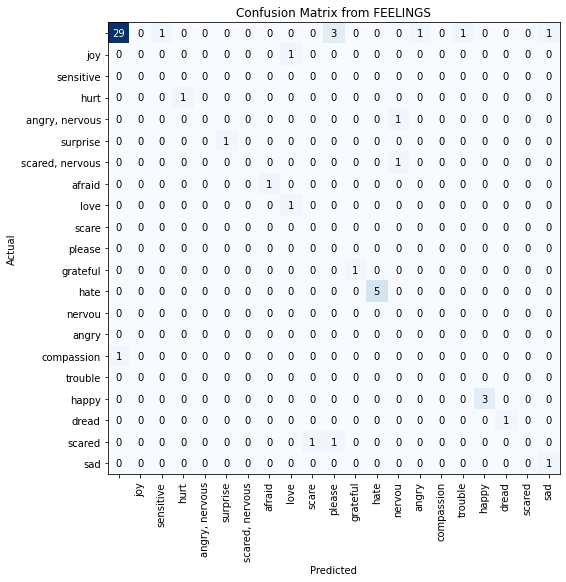

In [67]:
labels = list(set(np.append(y_act, y_pred)))
cm = confusion_matrix(y_act, y_pred, labels=labels)
cm_plot_fee = nvc.plot_cm(cm, labels, title='Confusion Matrix from FEELINGS', figsize=(12,8))

In [75]:
# Confusion Matrix - USING CATEGORIES - possibly more useful
# TODO - FIXME
# cm_plots = labels = cms = []
# row = 0
# cols = ['feelings', 'needs', 'absolutes']
# for i in range(len(cols)):
#     y_act = act_df.loc[:,cols[i]].values
#     y_pred = pred_df.loc[:,cols[i]].values
#     labels.append(list(set(np.append(y_act, y_pred))))
#     cms.append(confusion_matrix(y_act, y_pred, labels=labels[-1]))
#     cm_plots.append(nvc.plot_cm(cms[-1], labels[-1], title=f'Confusion Matrix from {labels[-1]}'))

# Concluding Thoughts

In [185]:
# TODO - think about adding sentiment analysis
# from nltk.sentiment import SentimentAnalyzer
# sentim_analyzer = SentimentAnalyzer()

# 👉 Part 2: NVC Needs Guessing via Machine Learning - TODO

Using machine learning, we can make needs guesses given an input statement?

**Objective:** 

**Examples**

If the user says: "When you leave like that it makes me feel scared." Then the system makes needs guesses
* safety
* comfort
* etc

If the user says: "I feel really annoyed when you talk to me like that." Then the system makes needs guesses
* patience
* etc

In [172]:
# Load training data
# Train ML model
# Try it

# 👉 Utilities for Testing ONE INPUT AT A TIME

Choose an example sentence then run the cells that follow

In [4]:
sent = act_df.loc[0,'user_input']
sent

'it makes me dread being around you'

In [5]:
kwp_df = nvc.load_dfs()
parsed = nvc.parse_sent(sent)

In [6]:
kwp_df.tail()

,kwp,category,feedback,needss_met,feelings_guesses,needs_guesses,kwp_lemma
422,i am,evaluations,you are not defined by what you feel; try inst...,na,na,na,i be
423,talk back,evaluations,na,na,na,na,talk back
424,like that,thoughts,na,na,na,na,like that
425,you need to,thoughts,na,na,na,na,you need to
426,can not believe,thoughts,na,na,na,na,can not believe


In [7]:
parsed

,lemma,lemma_alt,stem,pos,tag,dep
it,-PRON-,it,it,PRON,PRP,nsubj
makes,make,make,make,VERB,VBZ,ROOT
me,-PRON-,me,me,PRON,PRP,nsubj
dread,dread,dread,dread,VERB,VB,ccomp
being,be,be,be,AUX,VBG,xcomp
around,around,around,around,ADP,IN,prep
you,-PRON-,you,you,PRON,PRP,pobj


In [8]:
m1 = nvc.find_kwp_matches(parsed, kwp_df)
m1

,kwpm
observations,NaN
feelings,dread
needs,NaN
needs_guesses,NaN
requests,NaN
fofeelings,NaN
thoughts,NaN
evaluations,NaN
absolutes,NaN


In [9]:
m2 = nvc.find_pos_matches(parsed)
m2

,posm
observations,NaN
feelings,NaN
needs,NaN
needs_guesses,NaN
requests,NaN
fofeelings,NaN
thoughts,NaN
evaluations,
absolutes,NaN


In [10]:
tools_res = nvc.compare_tools(sent)
tools_res

,kwpm,posm,accur_probability
observations,,,0
feelings,dread,,0
needs,,,0
needs_guesses,,,0
requests,,,0
fofeelings,,,0
thoughts,,,0
evaluations,,,0
absolutes,,,0


In [11]:
pred_df = nvc.get_raw_feedback(sent)
pred_df

,observations,feelings,needs,needs_guesses,requests,fofeelings,thoughts,evaluations,absolutes
0,,dread,,,,,,,


In [13]:
# Feedback
for col in pred_df.columns:
    data = pred_df.loc[0, col]
    if data:
        data_list = data.split(',')
        for i in data_list:
            feedback = kwp_df.loc[kwp_df['kwp_lemma'] == i, 'feedback'].values
            print(f'feeback on {col}: {i} is {feedback}')

feeback on feelings: dread is ['na']


In [17]:
print(f'user_input: {sent}')
i_act = act_df.loc[act_df['user_input'] == sent, act_df.columns[1:]]
i_pred = pd.DataFrame(pred_df.loc[0,:]).T

print('actual_feedback')
display(i_act)
print('predicted_feedback')
display(i_pred)

user_input: it makes me dread being around you
actual_feedback


,observations,feelings,needs,needs_guesses,requests,fofeelings,thoughts,evaluations,absolutes
0,,dread,,,,,makes me,,


predicted_feedback


,observations,feelings,needs,needs_guesses,requests,fofeelings,thoughts,evaluations,absolutes
0,,dread,,,,,,,


Now, we can create confusion matricies to see our results graphically

In [23]:
# TODO - account for multiple values per column???
act_data = list(i_act.loc[0,:].values)
print(f'act_data: {act_data}')
pred_data = list(i_pred.loc[0,:].values)
print(f'pred_data: {pred_data}')

act_data: ['', 'dread', '', '', '', '', 'makes me', '', '']
pred_data: ['', 'dread', '', '', '', '', '', '', '']


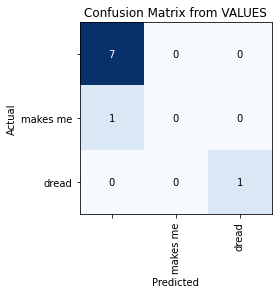

In [28]:
# Confusion Matrix - USING VALUES - agruably not useful (cm makes more sense for multiple datapoints like done above)
labels = list(set(act_data + pred_data))
cm = confusion_matrix(act_data, pred_data, labels=labels)
f = nvc.plot_cm(cm, labels, title='Confusion Matrix from VALUES')